In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
netflix = pd.read_csv('netflix_titles.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [7]:
# percentage of missing data
netflix.isnull().sum()/6234*100

show_id          0.000000
type             0.000000
title            0.000000
director        31.584857
cast             9.143407
country          7.635547
date_added       0.176452
release_year     0.000000
rating           0.160411
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
netflix['rating']

0          TV-PG
1          TV-MA
2       TV-Y7-FV
3          TV-Y7
4          TV-14
          ...   
6229          NR
6230       TV-MA
6231         NaN
6232       TV-MA
6233       TV-14
Name: rating, Length: 6234, dtype: object

In [12]:
netflix.corr()

,show_id,release_year
show_id,1.000000,0.566577
release_year,0.566577,1.000000


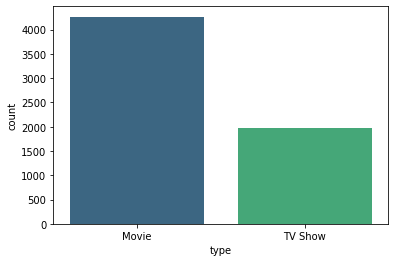

In [13]:
# Type of Contents
sns.countplot(x = 'type', data = netflix, palette = 'viridis')

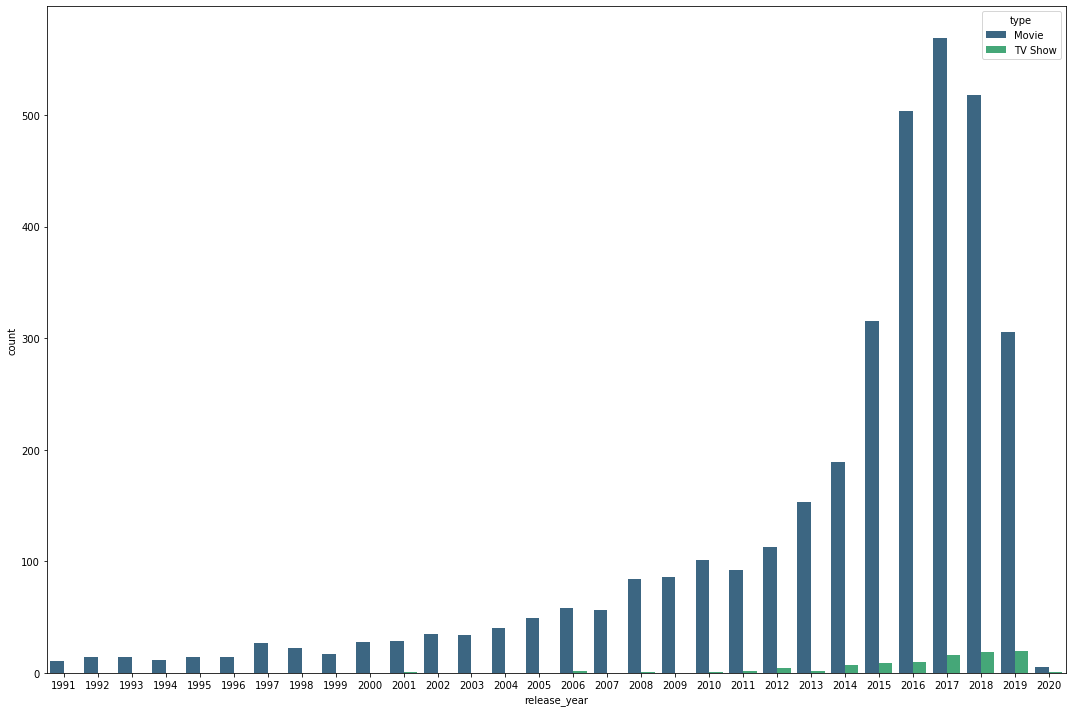

In [77]:
netf_mill = netflix[netflix['release_year'] > 1990]

plt.figure(figsize=(15,10))
sns.countplot(x = 'release_year', data = netf_mill, palette = 'viridis', hue = 'type')
plt.tight_layout()

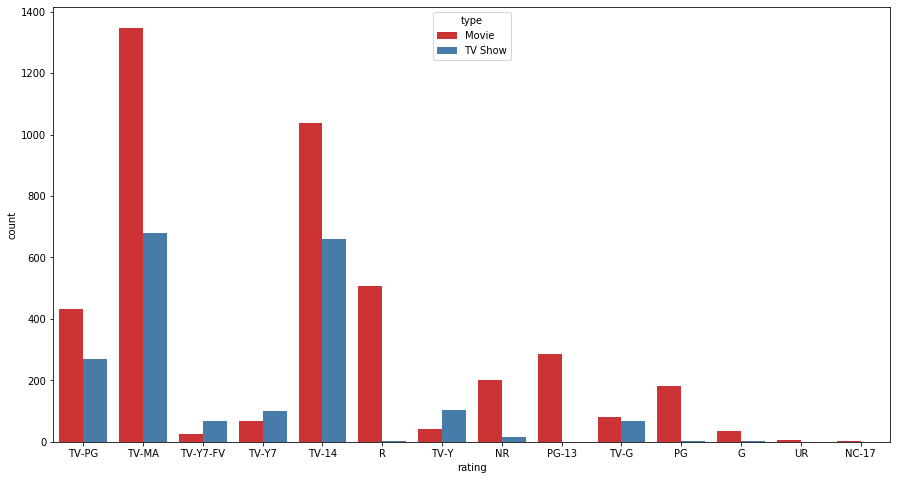

In [26]:
plt.figure(figsize = (15,8) )
sns.countplot(x = 'rating', hue = 'type', data = netflix, palette = 'Set1')

In [32]:
netflix['country'].value_counts()

United States                                         2032
India                                                  777
United Kingdom                                         348
Japan                                                  176
Canada                                                 141
                                                      ... 
United States,                                           1
Spain, Cuba                                              1
Somalia, Kenya, Sudan, South Africa, United States       1
Netherlands, Belgium, Germany, Jordan                    1
Argentina, United States                                 1
Name: country, Length: 554, dtype: int64

In [39]:
netflix['country'][555].split()

['Canada,', 'Luxembourg']

In [54]:
netflix['country'][1].split(',')

['United Kingdom']

In [59]:
def get_country(nation):
    return nation.split(',')[0]



In [60]:
get_country(netflix['country'][555])

'Canada'

In [62]:
netflix['country'].apply(get_country)
# engga bisa karena ternyata ada NaN data

AttributeError: 'float' object has no attribute 'split'

In [64]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [66]:
netflix = netflix.dropna()

In [67]:
netflix.info()
# from 6234 to 3774 data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 383.3+ KB


In [68]:
netflix['country'] = netflix['country'].apply(get_country)

D:\Users\PC Guy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
netflix['country'].value_counts()

United States     1505
India              737
United Kingdom     253
Canada             114
France              93
                  ... 
Croatia              1
Venezuela            1
Guatemala            1
Iran                 1
Slovenia             1
Name: country, Length: 68, dtype: int64

In [74]:
netflix[netflix['country'] == 'United States']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",United States,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...",United States,"September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,"September 8, 2017",2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,"September 8, 2017",2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5799,80133311,TV Show,Riverdale,Rob Seidenglanz,"K.J. Apa, Lili Reinhart, Camila Mendes, Cole S...",United States,"May 23, 2019",2019,TV-14,3 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","While navigating the troubled waters of sex, r..."
5800,80027042,TV Show,The Flash,Glen Winter,"Grant Gustin, Candice Patton, Danielle Panabak...",United States,"May 22, 2019",2019,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Sci-...",A forensics expert who wakes from a coma with ...
5803,70242081,TV Show,Arrow,James Bamford,"Stephen Amell, Katie Cassidy, David Ramsey, Wi...",United States,"May 21, 2019",2019,TV-14,7 Seasons,"Crime TV Shows, TV Action & Adventure","Based on DC Comics' Green Arrow, an affluent p..."
5810,70143864,TV Show,Royal Pains,Jay Chandrasekhar,"Mark Feuerstein, Paulo Costanzo, Reshma Shetty...",United States,"May 18, 2017",2016,TV-PG,8 Seasons,"TV Comedies, TV Dramas",Dr. Hank Lawson unexpectedly gets a career upg...


In [75]:
netflix.groupby('type').mean()

,show_id,release_year
type,,
Movie,7.502522e+07,2011.988581
TV Show,7.832160e+07,2015.875000


In [76]:
netflix.describe()

,show_id,release_year
count,3.774000e+03,3774.000000
mean,7.510908e+07,2012.087440
std,1.341114e+07,9.566944
min,2.477470e+05,1942.000000
25%,7.027581e+07,2011.000000
50%,8.014732e+07,2016.000000
75%,8.024067e+07,2017.000000
max,8.123573e+07,2020.000000
